# UnitTesting

## Unit Testing
Software testing is a practice in software development, whereby a software component is examined to verify that it conforms to specification. Carrying out comprehensive tests, which validate each single requirement, is of fundamental importance in the development of an application.

There are various ways to test software. We will focus on a practice which consists in executing the application under specific conditions, in order to observe how it responds. More specifically, we will focus on unit testing. In unit testing, each `unit`, the smallest component of a system, is isolated and tested individually. As a concrete example, a unit may be a function. In this case, unit testing consists in feeding a predefined input to the function and then comparing the output it returns with the output we expect.

This divide and conquer approach is a very efficient way to validate requirements. It also helps to locate possible bugs. This is because, if we know that all the units behave as expected on their own, we can be confident that any failure to conform is likely stemming from the interactions between units. Unit interactions are tested in a separate phase, called `integration testing`, which we will not discuss in this class.

Watch the following 2-min video for a more clear understanding about Unit Testing.

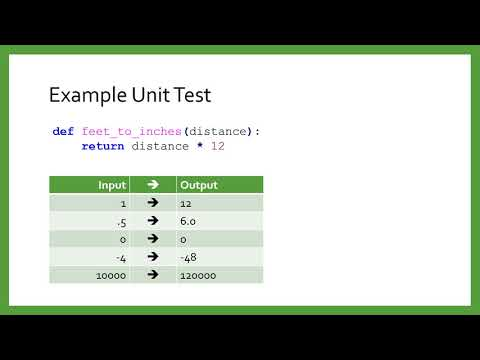

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('upzTwaVNZzs')

## Hands On

Below, we define a simple Calculator class that we will be using as a running example in this tutorial. 

The Python's Unit Testing Framework we will be using is called `unittest`, one of the best known frameworks for testing Python code.

In [2]:
import unittest

Our basic calculator has only four operations: addition, subtraction, multiplication and division.

In [3]:
class Calculator:
    def __init__(self):
        pass

    def add(self, a, b):
        return a + b

    def sub(self, a, b):
        return a - b
  
    def mul(self, a, b):
        return a * b

    def div(self, a, b):
        if b != 0:
            return a / b

The objective is to ensure that each method is working properly and that it returns the right output for any input pair.

A test case is created by subclassing `unittest.TestCase`.

In [4]:
class TestCalculator(unittest.TestCase):
  
    def test_add_returns_sum_when_numerical_arguments_provided(self):
        '''Test case function for addition'''
        self.calc = Calculator()
        result = self.calc.add(4, 7)
        expected = 11
        self.assertEqual(result, expected)

    def test_sub_returns_difference_when_numerical_arguments_provided(self):
        '''Test case function for subtraction'''
        self.calc = Calculator()
        result = self.calc.sub(10, 5)
        expected = 5
        self.assertEqual(result, expected)

    @unittest.skip('Some reason')
    def test_mul_returns_product_when_numerical_arguments_provided(self):
        '''Test case function for multiplication'''
        self.calc = Calculator()
        result = self.calc.mul(3, 7)
        expected = 21
        self.assertEqual(result, expected)

    def test_div_returns_quotient_when_divisor_not_zero(self):
        '''Test case function for division'''
        self.calc = Calculator()
        result = self.calc.div(10, 2)
        expected = 4
        self.assertEqual(result, expected)

We created 4 unit tests, each of which is checking a method of the Calculator class. These checks are being done through calls to `assertion` methods, in this case the `assertEqual` method. Note that, flagging the method `test_mul` with `@unittest.skip('your_reason')` will skip the test for that method.

Note that the test names follow a specific convention. Namely, the first word, `test`, specifies what the method does (it tests some unit). After that, we specify what we are testing (i.e., the name of the unit under test). After that, we specify the expected behavior. And finally, we specify the circumstances under which such behavior is expected.

Naming your tests according to the above convention also forces you to think about all the configurations that should be tested. Can you think of other configurations that we should have tested?

Note that other naming conventions are possible:

https://methodpoet.com/unit-test-method-naming-convention/#:~:text=What%20are%20some%20popular%20naming%20conventions%20for%20unit,name.%20...%205%20When_Condition_Expect_Result%20...%206%20Given_When_Then%20

Choosing a good naming convention is very important as it makes immediately clear what each test does and helps to keep them organized. Different people may have different opinions as to what is the best naming convention. The important thing is that, once you have chosen a naming convention that you find clear, you stick to it.

To run the tests, do the following:

In [5]:
unittest.main(argv=[''], verbosity=2, exit=False)

test_add_returns_sum_when_numerical_arguments_provided (__main__.TestCalculator)
Test case function for addition ... ok
test_div_returns_quotient_when_divisor_not_zero (__main__.TestCalculator)
Test case function for division ... FAIL
test_mul_returns_product_when_numerical_arguments_provided (__main__.TestCalculator)
Test case function for multiplication ... skipped 'Some reason'
test_sub_returns_difference_when_numerical_arguments_provided (__main__.TestCalculator)
Test case function for subtraction ... ok

FAIL: test_div_returns_quotient_when_divisor_not_zero (__main__.TestCalculator)
Test case function for division
----------------------------------------------------------------------
Traceback (most recent call last):
  File "C:\Users\USER\AppData\Local\Temp/ipykernel_19400/4228767264.py", line 30, in test_div_returns_quotient_when_divisor_not_zero
    self.assertEqual(result, expected)
AssertionError: 5.0 != 4

---------------------------------------------------------------------

As you can check above, addition and subtraction passed, multiplication was intentionally skipped, and division failed.

In all of the above tests, we have used the assertEqual method. That is just one of many different `assertions`, which the Unittest class provides. An assertion defines the condition for passing the test. Here are a few other assertion methods: `assertNotEqual(a, b)`, `assertTrue(x)`, `assertFalse(x)`, `assertIs(a, b)`, `assertIsNot(a, b)`, `assertIsNone(x)` and many more.

You may be wondering what the line:

`unittest.main(argv=[''], verbosity=2, exit=False)`

does. It is responsible for running our tests. In it: the `argv` parameter may be used to specify a list of arguments for our tests; `verbosity=2` selects verbose mode for when the test output is displayed; `exit=False` says that execution should not stop after the tests have completed (so that, if there are other commands after unittest.main, they can be run too). 

## Exception Testing

All the `assert*` methods listed above are used to compare values (typically, the returned output value against the expected output value). We can also use assertions to verify whether an exception is raised. This can be done by using the `assertRaises` method:

`assertRaises(exception, callable, *args, **kwds)`

Where `exception` is the type of exception, `callable` is the method to be tested, and `args` are optional parameters passed to the `callable` method.

Let's change the calculator's division operation, just to see how `assertRaises` works.

In [6]:
class Calculator:
    def __init__(self):
        pass

    def add(self, a, b):
        return a + b

    def sub(self, a, b):
        return a - b
  
    def mul(self, a, b):
        return a * b

    def div(self, a, b):
        if b == 0:
            raise ZeroDivisionError("The divisor cannot be zero")
        return a / b

Whenever `div` is called with divisor equals 0 an error is raised. Check it by running the following test case:

In [7]:
class TestCalculator(unittest.TestCase):

    def test_div_raises_ZeroDivisionError_when_divisor_is_zero(self):
        '''
        Checking that ZeroDivisionError is raised when the divisor is 0
        '''
        self.calc = Calculator()
        self.assertRaises(ZeroDivisionError, self.calc.div, 10, 0)

unittest.main(argv=[''], verbosity=2, exit=False)

test_div_raises_ZeroDivisionError_when_divisor_is_zero (__main__.TestCalculator)
Checking that ZeroDivisionError is raised when the divisor is 0 ... ok

----------------------------------------------------------------------
Ran 1 test in 0.003s

OK


The test passes because 10 over 0 does raise a `ZeroDivisionError` exception. 

## Organization of Test Cases

The organization of test cases is essential to make them better, more independent and help with their maintenance. There are various standards related to automated tests that can be used in Unit Testing. We will discuss a few of these below.

### Organization by Instances

As seen previously, unit test cases are represented by `unittest.TestCase` instances. In other words, we created only one test class holding all the tests of its methods. To better organize the test code, it is possible to create different instances, each one containing a variety of tests for the same method.

Let's create another test case, specifically for testing the division method.

In [8]:
class TestCalcDiv(unittest.TestCase):

    def test_div_returns_quotient_when_divisor_not_zero(self):
        '''Testing the division method under normal circumstances'''
        self.calc = Calculator()
        self.assertEqual(self.calc.div(10, 5), 2)
        self.assertEqual(self.calc.div(12, 2), 6)

    def test_div_raises_ZeroDivisionError_when_divisor_is_zero(self):
        '''
        Checking that ZeroDivisionError is raised when the divisor is 0
        '''
        self.calc = Calculator()
        self.assertRaises(ZeroDivisionError, self.calc.div, 10, 0)

unittest.main(argv=[''], defaultTest='TestCalcDiv', verbosity=2, exit=False)

test_div_raises_ZeroDivisionError_when_divisor_is_zero (__main__.TestCalcDiv)
Checking that ZeroDivisionError is raised when the divisor is 0 ... ok
test_div_returns_quotient_when_divisor_not_zero (__main__.TestCalcDiv)
Testing the division method under normal circumstances ... ok

----------------------------------------------------------------------
Ran 2 tests in 0.003s

OK


The test case above will pass. 

### SetUp() and TearDown()

The setUp and tearDown methods are also useful in organizing test cases. When a `setUp` method is defined, the test runner will run that method **prior** to each test. Likewise, if a `tearDown` method is defined, the test runner will invoke that method **after** each test.

As you might have noticed, so far we have been creating an instance of Calculator (`self.calc = Calculator()`) in every method to be tested. To avoid repeating code we can do that only once, in the `setUp` method.

This is how our division test case looks like now:

In [9]:
class TestCalcDiv(unittest.TestCase):

    def setUp(self):
        '''Set up an instance of Calculator pior to every test execution'''
        self.calc = Calculator()

    def test_div_returns_quotient_when_divisor_not_zero(self):
        '''Testing the division method under normal circumstances'''
        self.assertEqual(self.calc.div(10, 5), 2)
        self.assertEqual(self.calc.div(12, 2), 6)

    def test_div_raises_ZeroDivisionError_when_divisor_is_zero(self):
        '''
        Checking that ZeroDivisionError is raised when the divisor is 0
        '''
        self.assertRaises(ZeroDivisionError, self.calc.div, 10, 0)

unittest.main(argv=[''], defaultTest='TestCalcDiv', verbosity=2, exit=False)

test_div_raises_ZeroDivisionError_when_divisor_is_zero (__main__.TestCalcDiv)
Checking that ZeroDivisionError is raised when the divisor is 0 ... ok
test_div_returns_quotient_when_divisor_not_zero (__main__.TestCalcDiv)
Testing the division method under normal circumstances ... ok

----------------------------------------------------------------------
Ran 2 tests in 0.002s

OK


The test case passed without problems. You can try creating your own `tearDown` method now.

## Final Consideration

Testing will not catch every error in the program, because it cannot evaluate every execution path in any but the most trivial programs. It cannot prove correctness. This problem can be reduced to the halting problem, which is undecidable.

## References

1. [Unit testing framework](https://docs.python.org/3/library/unittest.html)

## Other example 


## Unit Testing

[Unit testing](https://en.wikipedia.org/wiki/Unit_testing) is a method of testing your code by writing tests for individual functions.

Let's say you write a package which provides a function.  You want to convince someone (especially yourself) that the function works as intended.  An excellent way to do this is to write unit tests, which (assuming they pass) demonstrate that your function does what it is supposed to be doing, at least for the configurations you're testing.

## unittest package

[unittest](https://docs.python.org/3.8/library/unittest.html) is a built-in package which provides unit testing capabilities.

Generally, you define classes that inherit from `unittest.TestCase`.  Then you can add methods which test different functionality.

In [11]:
'foo'.upper().isupper()

True

In [10]:
import unittest

class TestStringMethods(unittest.TestCase):

    def test_upper_converts_string_to_upper_case(self):
        self.assertEqual('foo'.upper(), 'FOO')

    def test_isupper_returns_True_if_argument_is_upper_case(self):
        self.assertTrue('ABC'.isupper())

    def test_isupper_returns_False_if_argument_is_not_upper_case(self):
        self.assertFalse('Foo'.isupper())

    def test_split_returns_word_list_when_string_passed(self):
        s = 'hello world'
        self.assertEqual(s.split(), ['hello', 'world'])
            
    def test_split_raises_TypeError_when_separator_is_not_a_string(self):
        '''checks that s.split fails when the separator is not a string'''
        s = 'hello world'
        with self.assertRaises(TypeError):
            s.split(2)

We can then run our tests using `unittest.main()` (the arguments below are passed in so we can run it in Jupyter).

In [11]:
unittest.main(argv=['first-arg-is-ignored'], defaultTest='TestStringMethods', exit=False)

.....
----------------------------------------------------------------------
Ran 5 tests in 0.005s

OK


When using floating-point numbers, use `assertAlmostEqual` instead of `assertEqual` to test for numerical equality

In [12]:
1.2 - 1.0

0.19999999999999996

In [15]:
class TestFloatArithmetic(unittest.TestCase):
    
    def test_subtraction_returns_approximate_difference_when_floating_point_arguments_are_provided(self):
        self.assertAlmostEqual(1.2 - 1.0, 0.2)
        
    def test_subtraction_returns_exact_difference_when_floating_point_arguments_are_provided(self):
        self.assertEqual(1.2 - 1.0, 0.2 )

In [14]:
unittest.main(argv=['first-arg-is-ignored'], exit=False)

....F.....
FAIL: test_subtraction_returns_exact_difference_when_floating_point_arguments_are_provided (__main__.TestFloatArithmetic)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "C:\Users\USER\AppData\Local\Temp/ipykernel_19400/16638656.py", line 7, in test_subtraction_returns_exact_difference_when_floating_point_arguments_are_provided
    self.assertEqual(1.2 - 1.0, 0.2 )
AssertionError: 0.19999999999999996 != 0.2

----------------------------------------------------------------------
Ran 10 tests in 0.010s

FAILED (failures=1)


### Running from command line

The more common way to run unit tests is to have them in a test folder or file `test.py`.  You can then run tests using

```bash
python -m unittest test.py
```

Or use `pytest` via
```bash
pytest test.py
```

[pytest](https://docs.pytest.org/en/stable/) is another Python testing framework - it is compatible with `unittest`, and has additional functionality which we aren't going to cover.

## Test-Driven Development

You don't need to wait to implement everything in order to write your tests.  Writing your tests first is called **test-driven development**.  One advantage of test-driven development is that you'll know when you have succeeded in your implementation, since all your tests will pass.

To practice with TDD, I encourage you to re-write all the classes you did in the OOP exercises. But this time, start writing the tests first, following the TDD approach.

The more mathematically-minded among you may want to give a shot at the following exercise instead (or, as well). For this, you may need to research some functions from the numpy library, and also to refresh your memory on some linear algebra concepts from your Uni days. To be clear, the following exercise is OPTIONAL!

Consider a suite of tests that test a `power_method` function:

In [17]:
import numpy as np
np.ones((5,5))

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [18]:
class TestPowerMethod(unittest.TestCase):
    
    def test_powermethod_returns_eigenpair_when_the_argument_is_a_matrix(self):
        n = 5
        A = np.random.randn((n,n))
        A = A + A.T                # make symmetric by adding transpose
        lam, v = powermethod(A)    # returns eigenvalue, eigenvector pair
        v2 = A @ v                 # matrix-vector multiplication
        # on the next line, * is scalar multiplication
        self.assertAlmostEqual(np.linalg.norm(v2 - lam * v), 0) 
    
    def test_powermethod_returns_normalized_eigenvector(self):
        n = 5
        A = np.random.randn((n,n))
        A = A + A.T 
        lam, v = powermethod(A)
        self.assertAlmostEqual(np.linalg.norm(v), 1)
    
    def test_powermethod_returns_pure_diagonal_when_matrix_has_rank_one(self):
        n = 5
        A = np.ones((n,n))
        lam, v = powermethod(A)
        # check that v is close to constant function.
        self.assertAlmostEqual(np.linalg.norm(v - np.ones(n)/np.sqrt(n)), 0)
        

### Exercise

Implement a function `powermethod` which satisfies the above tests (using the Power method algorithm, of course)

https://www.sciencedirect.com/topics/mathematics/power-method

If you don't understand the last test, the following may help (combined with the fact that the norm of the returned vector must be one, as checked in the second test):

https://math.stackexchange.com/questions/217521/what-are-the-eigenvalues-of-matrix-that-have-all-elements-equal-1

NOTE (to explain the way I named the last test): by `pure diagonal` vector, I mean a vector whose elements are all equal, the reason being that it makes the same angle with all co-ordinate axes (https://math.stackexchange.com/questions/1626821/what-is-the-name-of-a-vector-with-all-equal-elements). 
You may also recall that the rank of a matrix is the number of independent column vectors. In the last test above, all the columns in the matrix A are equal. Therefore, the rank is one.

In [ ]:
## Your code here


## Further Examples

* Check out `test.py` in each homework assignment, which is used for autograding.
* You can find another example in the repository [`python-packages`](https://github.com/caam37830/python-packages)

## Continuous Integration

[Continuous Integration](https://en.wikipedia.org/wiki/Continuous_integration), or CI, is the practice of automatically building code and running tests *continuously*.  Continuously in this case generally means any time changes are made, which might be multiple times a day.

The advantage of CI is that when you make changes to your code, you quickly find out if there are problems that need to be solved if your tests fail.  You can run these tests before merging branches in your git repository, making sure that checks pass.

[GitHub actions](https://docs.github.com/en/free-pro-team@latest/actions/learn-github-actions/introduction-to-github-actions) is one way of implementing CI.  This is what we are using in this class - you can find an example in the [`python-packages` repository](https://github.com/caam37830/python-packages/blob/main/.github/workflows/push.yml).

Another popular option which you may see in open source software is [Travis-CI](https://travis-ci.org/).  

Both these platforms are configured using a `*.yml` file.  See the [`python-packages` repository](https://github.com/caam37830/python-packages/blob/main/.github/workflows/push.yml) for an example.

You can do more than just run unit tests using CI, such as running integration tests, verifying that data analyses don't change, etc.